# Zillow Exercises
---

## Data Wrangling

**For the following, iterate through the steps you would take to create functions: Write the code to do the following in a jupyter notebook, test it, convert to functions, then create the file to house those functions.**

**You will have a zillow.ipynb file and a helper file for each section in the pipeline.**

### acquire & summarize
**1. Acquire data from mySQL using the python module to connect and query. You will want to end with a single dataframe. Make sure to include: the logerror, all fields related to the properties that are available. You will end up using all the tables in the database.**
 - ***Be sure to do the correct join (inner, outer, etc.). We do not want to eliminate properties purely because they may have a null value for `airconditioningtypeid`.***
 - **Only include properties with a transaction in 2017, and include only the last transaction for each property (so no duplicate property ID's), along with zestimate error and date of transaction.**
 - **Only include properties that include a latitude and longitude value.**

In [1]:
# imports
import pandas as pd
from matplotlib import pyplot as plt


# define function to get url to access sql databases
def get_url(db):
    '''
    This function takes in a database name and returns a url (using the specified 
    database name as well as host, user, and password from env.py) for use in the 
    pandas.read_sql() function.
    '''
    from env import host, user, password
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'
# get url for zilllow database
url = get_url('zillow')
# write sql query to select data
sql = '''
SELECT *
FROM properties_2017
LEFT JOIN predictions_2017 pred USING(parcelid)
LEFT JOIN airconditioningtype USING(airconditioningtypeid)
LEFT JOIN architecturalstyletype USING(architecturalstyletypeid)
LEFT JOIN buildingclasstype USING(buildingclasstypeid)
LEFT JOIN heatingorsystemtype USING(heatingorsystemtypeid)
LEFT JOIN propertylandusetype USING(propertylandusetypeid)
LEFT JOIN storytype USING(storytypeid)
LEFT JOIN typeconstructiontype USING(typeconstructiontypeid)
WHERE latitude IS NOT NULL
AND longitude IS NOT NULL
AND transactiondate LIKE "2017%%"
AND pred.id IN (SELECT MAX(id)
FROM predictions_2017
GROUP BY parcelid
HAVING MAX(transactiondate));
'''
# assign query result to zillow dataframe
zillow = pd.read_sql(sql, url)

In [2]:
# preview data
zillow.head()

,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,parcelid,id,basementsqft,...,id,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,NaN,NaN,261.0,NaN,NaN,NaN,NaN,14297519,1727539,NaN,...,0,0.025595,2017-01-01,None,None,None,None,Single Family Residential,None,None
1,NaN,NaN,261.0,NaN,NaN,NaN,NaN,17052889,1387261,NaN,...,1,0.055619,2017-01-01,None,None,None,None,Single Family Residential,None,None
2,NaN,NaN,261.0,NaN,NaN,NaN,NaN,14186244,11677,NaN,...,2,0.005383,2017-01-01,None,None,None,None,Single Family Residential,None,None
3,NaN,NaN,261.0,2.0,NaN,NaN,NaN,12177905,2288172,NaN,...,3,-0.103410,2017-01-01,None,None,None,Central,Single Family Residential,None,None
4,NaN,NaN,266.0,2.0,NaN,NaN,1.0,10887214,1970746,NaN,...,4,0.006940,2017-01-01,Central,None,None,Central,Condominium,None,None


**2. Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)**

In [3]:
# view summary stats
zillow.describe()

,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,parcelid,id,basementsqft,...,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,id,logerror
count,222.000000,50.0,77380.000000,49439.000000,15.000000,206.000000,24953.000000,7.738000e+04,7.738000e+04,50.000000,...,172.0,7.726800e+04,7.737900e+04,77380.0,7.737800e+04,77375.000000,2886.000000,7.713600e+04,77380.000000,77380.000000
mean,6.040541,7.0,261.826350,3.920447,3.933333,7.388350,1.813289,1.300715e+07,1.495126e+06,679.720000,...,1.0,1.893160e+05,4.901375e+05,2016.0,3.010969e+05,5995.566592,14.087318,6.049674e+13,38848.191794,0.016628
std,0.557285,0.0,5.141231,3.592789,0.258199,2.734542,2.967894,3.481368e+06,8.609057e+05,689.703546,...,0.0,2.300886e+05,6.534477e+05,0.0,4.925990e+05,7622.887460,2.185663,1.535252e+12,22402.140388,0.170190
min,4.000000,7.0,31.000000,1.000000,3.000000,2.000000,1.000000,1.071186e+07,3.490000e+02,38.000000,...,1.0,4.400000e+01,1.000000e+03,2016.0,1.610000e+02,19.920000,3.000000,6.037101e+13,0.000000,-4.655420
25%,6.000000,7.0,261.000000,2.000000,4.000000,7.000000,1.000000,1.153830e+07,7.520500e+05,273.000000,...,1.0,8.426500e+04,2.070000e+05,2016.0,8.550400e+04,2715.585000,14.000000,6.037311e+13,19460.750000,-0.024377
50%,6.000000,7.0,261.000000,2.000000,4.000000,7.000000,1.000000,1.253155e+07,1.497870e+06,515.000000,...,1.0,1.364995e+05,3.589760e+05,2016.0,2.033835e+05,4450.720000,15.000000,6.037603e+13,38869.500000,0.006627
75%,6.000000,7.0,266.000000,7.000000,4.000000,7.000000,1.000000,1.421184e+07,2.240480e+06,796.500000,...,1.0,2.187875e+05,5.690030e+05,2016.0,3.668022e+05,6927.800000,15.000000,6.059042e+13,58252.250000,0.039204
max,13.000000,7.0,275.000000,24.000000,4.000000,21.000000,13.000000,1.676893e+08,2.982274e+06,3560.000000,...,1.0,1.142179e+07,4.906124e+07,2016.0,4.895220e+07,586639.300000,99.000000,4.830301e+14,77612.000000,5.262999


In [4]:
# view shape
zillow.shape

(77380, 69)

In [5]:
# view info
zillow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77380 entries, 0 to 77379
Data columns (total 69 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   typeconstructiontypeid        222 non-null    float64
 1   storytypeid                   50 non-null     float64
 2   propertylandusetypeid         77380 non-null  float64
 3   heatingorsystemtypeid         49439 non-null  float64
 4   buildingclasstypeid           15 non-null     float64
 5   architecturalstyletypeid      206 non-null    float64
 6   airconditioningtypeid         24953 non-null  float64
 7   parcelid                      77380 non-null  int64  
 8   id                            77380 non-null  int64  
 9   basementsqft                  50 non-null     float64
 10  bathroomcnt                   77380 non-null  float64
 11  bedroomcnt                    77380 non-null  float64
 12  buildingqualitytypeid         49671 non-null  float64
 13  c

In [6]:
# list columns for histogram plotting
hist_cols = ['basementsqft', 
 'bathroomcnt', 
 'bedroomcnt', 
 'calculatedbathnbr', 
 'finishedfloor1squarefeet', 
 'calculatedfinishedsquarefeet', 
 'finishedsquarefeet12', 
 'finishedsquarefeet13',
 'finishedsquarefeet15',
 'finishedsquarefeet50',
 'finishedsquarefeet6', 
 'fireplacecnt',
 'fullbathcnt',
 'garagecarcnt',
 'garagetotalsqft',
 'hashottuborspa',
 'lotsizesquarefeet',
 'poolcnt',
 'poolsizesum',
 'roomcnt',
 'threequarterbathnbr',
 'unitcnt',
 'yardbuildingsqft17',
 'yardbuildingsqft26',
 'yearbuilt',
 'numberofstories',
 'fireplaceflag',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'assessmentyear',
 'landtaxvaluedollarcnt',
 'taxamount',
 'taxdelinquencyyear',
 'logerror']

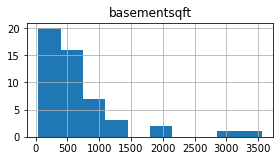

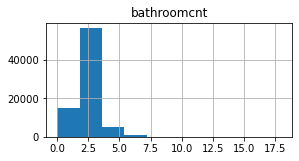

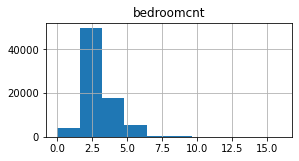

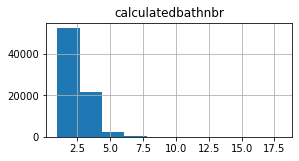

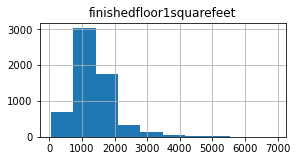

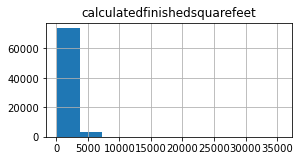

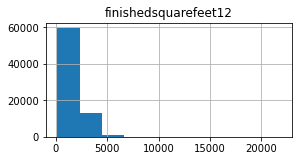

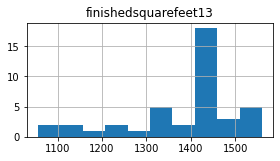

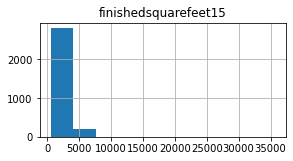

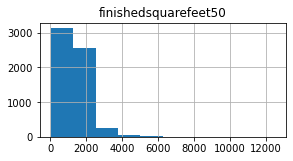

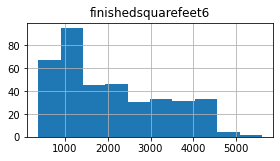

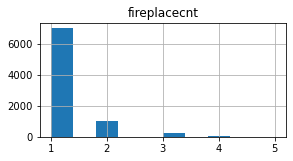

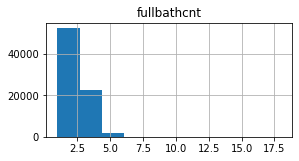

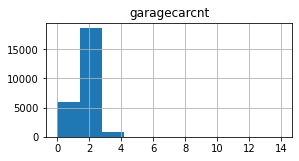

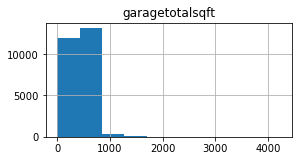

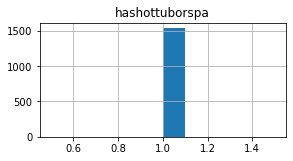

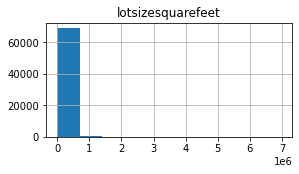

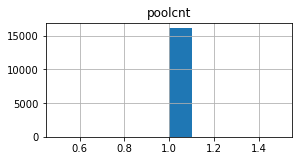

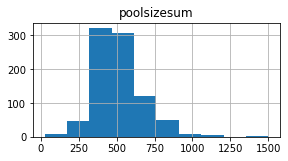

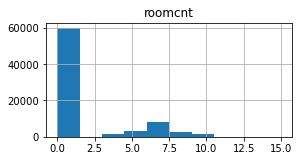

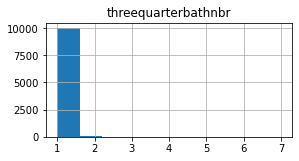

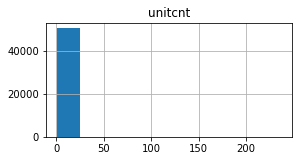

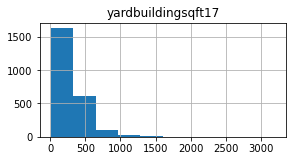

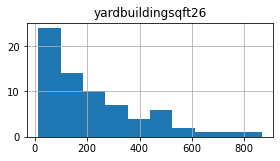

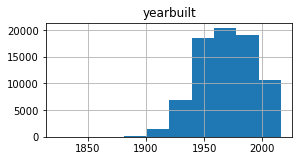

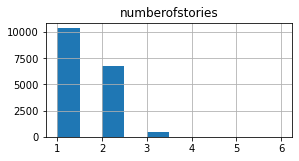

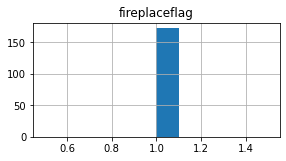

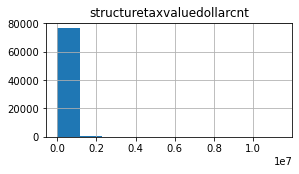

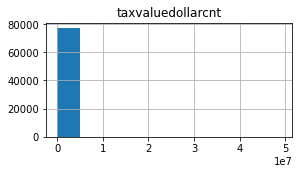

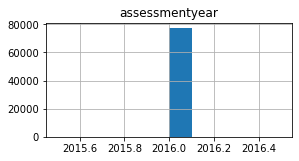

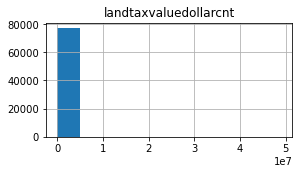

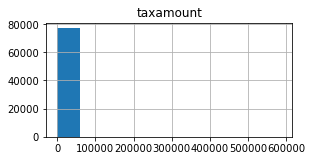

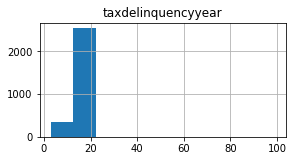

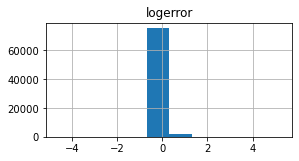

In [7]:
# for loop to plot histograms
for i, col in enumerate(hist_cols):
    i += 1
    plt.figure(figsize=(15,50))
    plt.subplot(20,3,i)
    zillow[col].hist()
    plt.title(col)
    plt.show()

In [8]:
# view value counts for object dtypes
for col in zillow.drop(columns=['id', 'typeconstructiontypeid', 'storytypeid', 
                     'propertylandusetypeid', 'heatingorsystemtypeid', 
                     'buildingclasstypeid', 'architecturalstyletypeid', 
                     'airconditioningtypeid']).columns:
    print(col)
    print(zillow[col].value_counts())
    print()

parcelid
11933699    1
11505743    1
11709951    1
11445758    1
14728701    1
           ..
12792914    1
13840735    1
12083865    1
14183064    1
12853244    1
Name: parcelid, Length: 77380, dtype: int64

basementsqft
640.0     2
900.0     2
515.0     2
700.0     2
273.0     2
912.0     2
100.0     2
3560.0    1
786.0     1
204.0     1
1416.0    1
512.0     1
38.0      1
1809.0    1
168.0     1
280.0     1
1252.0    1
604.0     1
1218.0    1
396.0     1
645.0     1
314.0     1
819.0     1
600.0     1
200.0     1
380.0     1
252.0     1
384.0     1
669.0     1
394.0     1
224.0     1
3112.0    1
405.0     1
800.0     1
588.0     1
352.0     1
90.0      1
126.0     1
254.0     1
1969.0    1
112.0     1
674.0     1
300.0     1
Name: basementsqft, dtype: int64

bathroomcnt
2.0     31484
3.0     17313
1.0     12902
2.5      6604
4.0      3352
1.5      1415
3.5      1034
5.0      1026
4.5       695
0.0       592
6.0       417
5.5       224
7.0       113
8.0       108
6.5        47
9.0    

**Takeaways:**

I know I'm going to need to drop the 2 `id` columns. They're unnecessary and the identical column names only cause problems. I'll probably also want to drop all of the `%typeid` columns since I have columns containing their corresponding descriptions.

Some of these columns could be replaced with 0/1 since they seem to be essentially boolean values. For example, 'hashottuborspa' only has 1 and null for values; I could replace all null values with 0 and have a useable column that tells me whether or not properties have a hot tub or a spa. However, there is the chance that some of the properties with nulls in this column may just not be recorded which would probably lead to more error in the model's predictions, so I'll put that on the backburner for now.

There are a lot of nulls and a lot of potential features to sort through.

**3. Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an attribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values.**

|           | num_rows_missing | pct_rows_missing |
| ---       | ---              |                  |
| parcelid  | 0                | 0.000000         |
| airconditioningtypeid	| 29041	| 0.535486        |
| architecturalstyletypeid | 54232 | 0.999982     |

In [9]:
# create dataframe of missing row info
pd.DataFrame(data={'num_rows_missing':zillow.isnull().sum(), 
              'pct_rows_missing':zillow.isnull().sum()/len(zillow)}, index=zillow.columns)

,num_rows_missing,pct_rows_missing
typeconstructiontypeid,77158,0.997131
storytypeid,77330,0.999354
propertylandusetypeid,0,0.000000
heatingorsystemtypeid,27941,0.361088
buildingclasstypeid,77365,0.999806
...,...,...
buildingclassdesc,77365,0.999806
heatingorsystemdesc,27941,0.361088
propertylandusedesc,0,0.000000
storydesc,77330,0.999354


In [10]:
# define function
def cols_missing_rows(df):
    '''
    This function takes in a dataframe and returns a dataframe of column names, the number
    of rows that column is missing, and the percentage of rows that column is missing.
    '''
    df = pd.DataFrame(data={'num_rows_missing':df.isnull().sum(), 
              'pct_rows_missing':df.isnull().sum()/len(df)}, index=df.columns)
    return df
# test function
zillow_cmr = cols_missing_rows(zillow)
zillow_cmr

,num_rows_missing,pct_rows_missing
typeconstructiontypeid,77158,0.997131
storytypeid,77330,0.999354
propertylandusetypeid,0,0.000000
heatingorsystemtypeid,27941,0.361088
buildingclasstypeid,77365,0.999806
...,...,...
buildingclassdesc,77365,0.999806
heatingorsystemdesc,27941,0.361088
propertylandusedesc,0,0.000000
storydesc,77330,0.999354


In [11]:
# view value counts for missing rows per column
zillow_cmr.value_counts()

num_rows_missing  pct_rows_missing
0                 0.000000            17
77330             0.999354             3
27941             0.361088             2
77174             0.997338             2
77158             0.997131             2
74494             0.962704             2
71357             0.922163             2
52427             0.677526             2
51906             0.670793             2
77365             0.999806             2
609               0.007870             2
1471              0.019010             1
112               0.001447             1
77339             0.999470             1
2                 0.000026             1
77310             0.999095             1
77208             0.997777             1
5                 0.000065             1
50                0.000646             1
76994             0.995012             1
76916             0.994004             1
76766             0.992065             1
76513             0.988796             1
76306             0.98

**Takeaways:**

- 17 columns are missing no data!
 - Hopefully they will contain some useful data that I can use for exploration and modeling. I'll have to investigate these columns to see if they're worth keeping.
- 34 columns are missing the majority (>60%) of their data.
 - I think I'll end up just dropping these columns completely, but first I want to make sure their absence won't be a problem.
   - Looking at the list of columns to be removed (cell below), I don't think I'll be losing out on too much valuable information by just dropping all of these columns.
- 18 columns are missing some data (<37%).

In [12]:
# see which columns are missing >60% of values
zillow_cmr[zillow_cmr.pct_rows_missing > 0.6].index

Index(['typeconstructiontypeid', 'storytypeid', 'buildingclasstypeid',
       'architecturalstyletypeid', 'airconditioningtypeid', 'basementsqft',
       'decktypeid', 'finishedfloor1squarefeet', 'finishedsquarefeet13',
       'finishedsquarefeet15', 'finishedsquarefeet50', 'finishedsquarefeet6',
       'fireplacecnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'regionidneighborhood', 'threequarterbathnbr', 'yardbuildingsqft17',
       'yardbuildingsqft26', 'numberofstories', 'fireplaceflag',
       'taxdelinquencyflag', 'taxdelinquencyyear', 'airconditioningdesc',
       'architecturalstyledesc', 'buildingclassdesc', 'storydesc',
       'typeconstructiondesc'],
      dtype='object')

**4. Write a function that takes in a dataframe and returns a dataframe with 3 columns: the number of columns missing, percent of columns missing, and number of rows with n columns missing. Run the function and document takeaways from this on how you want to handle missing values.**

| num_cols_missing| pct_cols_missing | num_rows |
| --- | --- | --- |
| 23 | 38.333 | 108 |
| 24 | 40.000 | 123 |
| 25 | 41.667 | 5280 |

In [13]:
# create dataframe of missing column info
pd.DataFrame({'num_cols_missing':zillow.isnull().sum(axis=1).value_counts().index,
              'pct_cols_missing':zillow.isnull().sum(axis=1).value_counts().index/len(zillow.columns),
              'num_rows':zillow.isnull().sum(axis=1).value_counts()}).reset_index(drop=True)

,num_cols_missing,pct_cols_missing,num_rows
0,33,0.478261,14782
1,34,0.492754,13326
2,32,0.463768,12579
3,31,0.449275,9891
4,36,0.521739,5775
5,29,0.420290,5270
6,35,0.507246,5148
7,37,0.536232,3620
8,30,0.434783,3455
9,38,0.550725,1925


In [14]:
# define function
def rows_missing_cols(df):
    '''
    This function takes in a dataframe and returns a dataframe of the number of columns
    missing from a row, the percentage of columns missing from a row, and the number of
    rows that are missing that number/percentage of columns.
    '''
    df = pd.DataFrame({'num_cols_missing':df.isnull().sum(axis=1).value_counts().index,
                       'pct_cols_missing':df.isnull().sum(axis=1).value_counts().index/len(df.columns),
                       'num_rows':df.isnull().sum(axis=1).value_counts()}).reset_index(drop=True)
    return df

# test function
rows_missing_cols(zillow)

,num_cols_missing,pct_cols_missing,num_rows
0,33,0.478261,14782
1,34,0.492754,13326
2,32,0.463768,12579
3,31,0.449275,9891
4,36,0.521739,5775
5,29,0.420290,5270
6,35,0.507246,5148
7,37,0.536232,3620
8,30,0.434783,3455
9,38,0.550725,1925


**Takeaways:**

- There are 0 rows missing no values; every row is missing at least 23 values.
- That's a lot of missing data!

### prepare
**1. Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer. But for this exercise, do not purely filter by unitcnt as we did previously. Add some new logic that will reduce the number of properties that are falsely removed. You might want to use # bedrooms, square feet, unit type or the like to then identify those with unitcnt not defined.**



In [15]:
zillow.unitcnt.value_counts(dropna=False)

1.0      47292
NaN      26818
2.0       2018
4.0        723
3.0        525
42.0         1
237.0        1
45.0         1
6.0          1
Name: unitcnt, dtype: int64

In [16]:
zillow.shape

(77380, 69)

In [17]:
# starting with 77380 rows
# filter down to only property types that could be single-unit residential
zillow_filt = zillow[zillow.propertylandusetypeid.isin([261, 262, 263, 264, 266, 268, 273, 276, 279])] # 71693 rows
# properties with at least 1 bathroom and bigger than 300 sqft
zillow_filt = zillow_filt[(zillow.bathroomcnt > 0) & (zillow.calculatedfinishedsquarefeet > 300)] # 71472 rows
# only properties listed as single-unit or without a value for unitcnt
zillow_filt = zillow_filt[(zillow_filt.unitcnt == 1) | (zillow_filt.unitcnt.isnull())] # 71437 rows
zillow_filt

<ipython-input-17-80a85c28f25f>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  zillow_filt = zillow_filt[(zillow.bathroomcnt > 0) & (zillow.calculatedfinishedsquarefeet > 300)] # 71472 rows


,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,parcelid,id,basementsqft,...,id,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,NaN,NaN,261.0,NaN,NaN,NaN,NaN,14297519,1727539,NaN,...,0,0.025595,2017-01-01,None,None,None,None,Single Family Residential,None,None
1,NaN,NaN,261.0,NaN,NaN,NaN,NaN,17052889,1387261,NaN,...,1,0.055619,2017-01-01,None,None,None,None,Single Family Residential,None,None
2,NaN,NaN,261.0,NaN,NaN,NaN,NaN,14186244,11677,NaN,...,2,0.005383,2017-01-01,None,None,None,None,Single Family Residential,None,None
3,NaN,NaN,261.0,2.0,NaN,NaN,NaN,12177905,2288172,NaN,...,3,-0.103410,2017-01-01,None,None,None,Central,Single Family Residential,None,None
4,NaN,NaN,266.0,2.0,NaN,NaN,1.0,10887214,1970746,NaN,...,4,0.006940,2017-01-01,Central,None,None,Central,Condominium,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77375,NaN,NaN,266.0,2.0,NaN,NaN,1.0,10833991,2864704,NaN,...,77608,-0.002245,2017-09-20,Central,None,None,Central,Condominium,None,None
77376,NaN,NaN,261.0,2.0,NaN,NaN,NaN,11000655,673515,NaN,...,77609,0.020615,2017-09-20,None,None,None,Central,Single Family Residential,None,None
77377,NaN,NaN,261.0,NaN,NaN,NaN,NaN,17239384,2968375,NaN,...,77610,0.013209,2017-09-21,None,None,None,None,Single Family Residential,None,None
77378,NaN,NaN,261.0,2.0,NaN,NaN,1.0,12773139,1843709,NaN,...,77611,0.037129,2017-09-21,Central,None,None,Central,Single Family Residential,None,None


In [18]:
# define function to remove any suspected non-single unit properties
def only_single_units(zillow):
    '''
    This function takes in the zillow dataframe and removes any properties not believed
    to be single-unit properties. It returns zillow without those properties.
    '''
    zillow_filt = zillow[zillow.propertylandusetypeid.isin([261, 262, 263, 264, 266, 268, 273, 276, 279])]
    zillow_filt = zillow_filt[(zillow.bathroomcnt > 0) & (zillow.calculatedfinishedsquarefeet > 300)]
    zillow_filt = zillow_filt[(zillow_filt.unitcnt == 1) | (zillow_filt.unitcnt.isnull())]
    return zillow_filt

# test function
zillow = only_single_units(zillow)
zillow

<ipython-input-18-63fb1d264281>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  zillow_filt = zillow_filt[(zillow.bathroomcnt > 0) & (zillow.calculatedfinishedsquarefeet > 300)]


,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,parcelid,id,basementsqft,...,id,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,NaN,NaN,261.0,NaN,NaN,NaN,NaN,14297519,1727539,NaN,...,0,0.025595,2017-01-01,None,None,None,None,Single Family Residential,None,None
1,NaN,NaN,261.0,NaN,NaN,NaN,NaN,17052889,1387261,NaN,...,1,0.055619,2017-01-01,None,None,None,None,Single Family Residential,None,None
2,NaN,NaN,261.0,NaN,NaN,NaN,NaN,14186244,11677,NaN,...,2,0.005383,2017-01-01,None,None,None,None,Single Family Residential,None,None
3,NaN,NaN,261.0,2.0,NaN,NaN,NaN,12177905,2288172,NaN,...,3,-0.103410,2017-01-01,None,None,None,Central,Single Family Residential,None,None
4,NaN,NaN,266.0,2.0,NaN,NaN,1.0,10887214,1970746,NaN,...,4,0.006940,2017-01-01,Central,None,None,Central,Condominium,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77375,NaN,NaN,266.0,2.0,NaN,NaN,1.0,10833991,2864704,NaN,...,77608,-0.002245,2017-09-20,Central,None,None,Central,Condominium,None,None
77376,NaN,NaN,261.0,2.0,NaN,NaN,NaN,11000655,673515,NaN,...,77609,0.020615,2017-09-20,None,None,None,Central,Single Family Residential,None,None
77377,NaN,NaN,261.0,NaN,NaN,NaN,NaN,17239384,2968375,NaN,...,77610,0.013209,2017-09-21,None,None,None,None,Single Family Residential,None,None
77378,NaN,NaN,261.0,2.0,NaN,NaN,1.0,12773139,1843709,NaN,...,77611,0.037129,2017-09-21,Central,None,None,Central,Single Family Residential,None,None


**2. Create a function that will drop rows or columns based on the percent of values that are missing: handle_missing_values(df, prop_required_column, prop_required_row).**
 - ***The input:***
  - **A dataframe**
  - **A number between 0 and 1 that represents the proportion, for each column, of rows with non-missing values required to keep the column. i.e. if prop_required_column = .6, then you are requiring a column to have at least 60% of values not-NA (no more than 40% missing).**
  - **A number between 0 and 1 that represents the proportion, for each row, of columns/variables with non-missing values required to keep the row. For example, if prop_required_row = .75, then you are requiring a row to have at least 75% of variables with a non-missing value (no more that 25% missing).**
 - ***The output:***
  - **The dataframe with the columns and rows dropped as indicated. Be sure to drop the columns prior to the rows in your function.**

*hint:*
  - *Look up the dropna documentation.*
  - *You will want to compute a threshold from your input values (prop_required) and total number of rows or columns.*
  - *Make use of inplace, i.e. inplace=True/False.*

Now that my data has been filtered down, I'll need to run `rows_missing_cols` and `cols_missing_rows` on the filtered data to get a sense of what I'm working with now.

However, since I'll be removing rows after I remove columns, I'll just run `cols_missing_rows` for now and then run `rows_missing_cols` on the dataframe after columns have been dropped.

In [19]:
cols_missing_rows(zillow).value_counts(sort=False)

num_rows_missing  pct_rows_missing
0                 0.000000            18
1                 0.000014             2
5                 0.000070             1
15                0.000210             2
35                0.000490             1
40                0.000560             1
73                0.001022             1
173               0.002422             1
208               0.002912             1
1324              0.018534             1
8034              0.112463             1
24929             0.348965             2
26185             0.366547             1
26187             0.366575             1
26546             0.371600             1
43344             0.606744             1
46528             0.651315             2
48437             0.678038             2
54451             0.762224             1
55735             0.780198             1
56827             0.795484             1
61450             0.860198             1
63359             0.886921             1
65768             0.92

**Takeaways:**

- 18 columns are missing no data.
- About half of the columns are missing the majority (>60%) of their values.

In [20]:
# keeps columns not missing more than thresh
# drop columns missing more than 60% of their data
zillow_tcols = zillow.dropna(axis=1, thresh=0.6*len(zillow))
zillow_tcols.columns

Index(['propertylandusetypeid', 'heatingorsystemtypeid', 'parcelid', 'id',
       'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedbathnbr', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'fips', 'fullbathcnt', 'latitude', 'longitude',
       'lotsizesquarefeet', 'propertycountylandusecode', 'propertyzoningdesc',
       'rawcensustractandblock', 'regionidcity', 'regionidcounty',
       'regionidzip', 'roomcnt', 'unitcnt', 'yearbuilt',
       'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'assessmentyear',
       'landtaxvaluedollarcnt', 'taxamount', 'censustractandblock', 'id',
       'logerror', 'transactiondate', 'heatingorsystemdesc',
       'propertylandusedesc'],
      dtype='object')

Now that I know which columns will be dropped based on their null value proportions, I need to look at the null values by rows and do the same. I'll need to run `rows_missing_cols(zillow_tcols)` to get a sense of what the rows' null proportions look like.

In [21]:
# view missing values for rows
rows_missing_cols(zillow_tcols)

,num_cols_missing,pct_cols_missing,num_rows
0,0,0.000000,41988
1,5,0.142857,18049
2,6,0.171429,6064
3,1,0.028571,2403
4,4,0.114286,1191
5,2,0.057143,916
6,3,0.085714,686
7,7,0.200000,110
8,8,0.228571,26
9,9,0.257143,4


In [22]:
# get summary stats of rows_missing_cols
rows_missing_cols(zillow_tcols).describe().T

,count,mean,std,min,25%,50%,75%,max
num_cols_missing,10.0,4.500000,3.027650,0.0,2.250000,4.500000,6.750000,9.000000
pct_cols_missing,10.0,0.128571,0.086504,0.0,0.064286,0.128571,0.192857,0.257143
num_rows,10.0,7143.700000,13431.809170,4.0,254.000000,1053.500000,5148.750000,41988.000000


**Takeaways:**

- Min: 41,988 rows missing 0 values.
- Overall, the number of missing values per row is much lower than I started with.
- No row is missing more than half of its values.
- Max: 4 rows missing 9 (25.7%) of their values

In [23]:
# set threshold for dropping rows with too many nulls
zillow_tcols.dropna(thresh=0.8*len(zillow_tcols.columns))

,propertylandusetypeid,heatingorsystemtypeid,parcelid,id,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,id,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc
0,261.0,NaN,14297519,1727539,3.5,4.0,NaN,3.5,3100.0,3100.0,...,1023282.0,2016.0,537569.0,11013.72,6.059063e+13,0,0.025595,2017-01-01,None,Single Family Residential
1,261.0,NaN,17052889,1387261,1.0,2.0,NaN,1.0,1465.0,1465.0,...,464000.0,2016.0,376000.0,5672.48,6.111001e+13,1,0.055619,2017-01-01,None,Single Family Residential
2,261.0,NaN,14186244,11677,2.0,3.0,NaN,2.0,1243.0,1243.0,...,564778.0,2016.0,479489.0,6488.30,6.059022e+13,2,0.005383,2017-01-01,None,Single Family Residential
3,261.0,2.0,12177905,2288172,3.0,4.0,8.0,3.0,2376.0,2376.0,...,145143.0,2016.0,36225.0,1777.51,6.037300e+13,3,-0.103410,2017-01-01,Central,Single Family Residential
4,266.0,2.0,10887214,1970746,3.0,3.0,8.0,3.0,1312.0,1312.0,...,119407.0,2016.0,45726.0,1533.89,6.037124e+13,4,0.006940,2017-01-01,Central,Condominium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77375,266.0,2.0,10833991,2864704,3.0,3.0,8.0,3.0,1741.0,1741.0,...,379000.0,2016.0,114000.0,4685.34,6.037132e+13,77608,-0.002245,2017-09-20,Central,Condominium
77376,261.0,2.0,11000655,673515,2.0,2.0,6.0,2.0,1286.0,1286.0,...,354621.0,2016.0,283704.0,4478.43,6.037101e+13,77609,0.020615,2017-09-20,Central,Single Family Residential
77377,261.0,NaN,17239384,2968375,2.0,4.0,NaN,2.0,1612.0,1612.0,...,67205.0,2016.0,16522.0,1107.48,6.111008e+13,77610,0.013209,2017-09-21,None,Single Family Residential
77378,261.0,2.0,12773139,1843709,1.0,3.0,4.0,1.0,1032.0,1032.0,...,49546.0,2016.0,16749.0,876.43,6.037434e+13,77611,0.037129,2017-09-21,Central,Single Family Residential


In [24]:
def handle_missing_values(df, prop_req_col, prop_req_row):
    '''
    This function takes in a dataframe, a max proportion of null values for each 
    column, and a max proportion of null values for each row. It returns the 
    dataframe less any rows or columns with more than the max proportion of nulls.
    '''
    df = df.dropna(axis=1, thresh=prop_req_col*len(df))
    df = df.dropna(thresh=prop_req_row*len(df.columns))
    return df

# test function
zillow = handle_missing_values(zillow, 0.6, 0.8)
zillow

,propertylandusetypeid,heatingorsystemtypeid,parcelid,id,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,id,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc
0,261.0,NaN,14297519,1727539,3.5,4.0,NaN,3.5,3100.0,3100.0,...,1023282.0,2016.0,537569.0,11013.72,6.059063e+13,0,0.025595,2017-01-01,None,Single Family Residential
1,261.0,NaN,17052889,1387261,1.0,2.0,NaN,1.0,1465.0,1465.0,...,464000.0,2016.0,376000.0,5672.48,6.111001e+13,1,0.055619,2017-01-01,None,Single Family Residential
2,261.0,NaN,14186244,11677,2.0,3.0,NaN,2.0,1243.0,1243.0,...,564778.0,2016.0,479489.0,6488.30,6.059022e+13,2,0.005383,2017-01-01,None,Single Family Residential
3,261.0,2.0,12177905,2288172,3.0,4.0,8.0,3.0,2376.0,2376.0,...,145143.0,2016.0,36225.0,1777.51,6.037300e+13,3,-0.103410,2017-01-01,Central,Single Family Residential
4,266.0,2.0,10887214,1970746,3.0,3.0,8.0,3.0,1312.0,1312.0,...,119407.0,2016.0,45726.0,1533.89,6.037124e+13,4,0.006940,2017-01-01,Central,Condominium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77375,266.0,2.0,10833991,2864704,3.0,3.0,8.0,3.0,1741.0,1741.0,...,379000.0,2016.0,114000.0,4685.34,6.037132e+13,77608,-0.002245,2017-09-20,Central,Condominium
77376,261.0,2.0,11000655,673515,2.0,2.0,6.0,2.0,1286.0,1286.0,...,354621.0,2016.0,283704.0,4478.43,6.037101e+13,77609,0.020615,2017-09-20,Central,Single Family Residential
77377,261.0,NaN,17239384,2968375,2.0,4.0,NaN,2.0,1612.0,1612.0,...,67205.0,2016.0,16522.0,1107.48,6.111008e+13,77610,0.013209,2017-09-21,None,Single Family Residential
77378,261.0,2.0,12773139,1843709,1.0,3.0,4.0,1.0,1032.0,1032.0,...,49546.0,2016.0,16749.0,876.43,6.037434e+13,77611,0.037129,2017-09-21,Central,Single Family Residential


In [25]:
# view columns still missing values
cols_missing_rows(zillow)[cols_missing_rows(zillow)['num_rows_missing'] > 0]

,num_rows_missing,pct_rows_missing
heatingorsystemtypeid,24899,0.348691
buildingqualitytypeid,26516,0.371336
finishedsquarefeet12,157,0.002199
lotsizesquarefeet,8032,0.112482
propertyzoningdesc,26155,0.366281
regionidcity,1311,0.018360
regionidzip,30,0.000420
unitcnt,26157,0.366309
yearbuilt,29,0.000406
structuretaxvaluedollarcnt,70,0.000980


**3. Decide how to handle the remaining missing values:**
 - **Fill with constant value.**
 - **Impute with mean, median, mode.**
 - **Drop row/column**

Looking at the dataframe above, I can see that some columns are still missing thousands of values. However, most of these columns are not columns I intend to use as features for modeling. Of the columns that still contain null values, I only want to use `yearbuilt`, which is missing 29 values. There are 26,157 null values in `unitcnt` but since I've already filtered down the data to properties that are most likely single-unit (based on their features), I feel comfortable dropping this column and assuming the properties that remain in this dataset are all single-unit properties. Since I don't believe they will be useful at this time, I will drop all columns in the dataframe above, except for `yearbuilt`. Additionally, since `yearbuilt` is only missing 29 values, I will drop those 29 rows because I don't believe dropping these properties will affect the data very much (since there are still so many other properties to look at).

In [26]:
# drop rows missing yearbuilt value
zillow = zillow[zillow.yearbuilt.notnull()]
zillow

,propertylandusetypeid,heatingorsystemtypeid,parcelid,id,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,id,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc
0,261.0,NaN,14297519,1727539,3.5,4.0,NaN,3.5,3100.0,3100.0,...,1023282.0,2016.0,537569.0,11013.72,6.059063e+13,0,0.025595,2017-01-01,None,Single Family Residential
1,261.0,NaN,17052889,1387261,1.0,2.0,NaN,1.0,1465.0,1465.0,...,464000.0,2016.0,376000.0,5672.48,6.111001e+13,1,0.055619,2017-01-01,None,Single Family Residential
2,261.0,NaN,14186244,11677,2.0,3.0,NaN,2.0,1243.0,1243.0,...,564778.0,2016.0,479489.0,6488.30,6.059022e+13,2,0.005383,2017-01-01,None,Single Family Residential
3,261.0,2.0,12177905,2288172,3.0,4.0,8.0,3.0,2376.0,2376.0,...,145143.0,2016.0,36225.0,1777.51,6.037300e+13,3,-0.103410,2017-01-01,Central,Single Family Residential
4,266.0,2.0,10887214,1970746,3.0,3.0,8.0,3.0,1312.0,1312.0,...,119407.0,2016.0,45726.0,1533.89,6.037124e+13,4,0.006940,2017-01-01,Central,Condominium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77375,266.0,2.0,10833991,2864704,3.0,3.0,8.0,3.0,1741.0,1741.0,...,379000.0,2016.0,114000.0,4685.34,6.037132e+13,77608,-0.002245,2017-09-20,Central,Condominium
77376,261.0,2.0,11000655,673515,2.0,2.0,6.0,2.0,1286.0,1286.0,...,354621.0,2016.0,283704.0,4478.43,6.037101e+13,77609,0.020615,2017-09-20,Central,Single Family Residential
77377,261.0,NaN,17239384,2968375,2.0,4.0,NaN,2.0,1612.0,1612.0,...,67205.0,2016.0,16522.0,1107.48,6.111008e+13,77610,0.013209,2017-09-21,None,Single Family Residential
77378,261.0,2.0,12773139,1843709,1.0,3.0,4.0,1.0,1032.0,1032.0,...,49546.0,2016.0,16749.0,876.43,6.037434e+13,77611,0.037129,2017-09-21,Central,Single Family Residential


Before I drop the columns that are still missing values, I want to look at all of the columns and drop other columns that I already know I don't intend to use, so I can work with less cluttered data moving forward.

In [27]:
# view 35 remaining columns
zillow.columns

Index(['propertylandusetypeid', 'heatingorsystemtypeid', 'parcelid', 'id',
       'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedbathnbr', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'fips', 'fullbathcnt', 'latitude', 'longitude',
       'lotsizesquarefeet', 'propertycountylandusecode', 'propertyzoningdesc',
       'rawcensustractandblock', 'regionidcity', 'regionidcounty',
       'regionidzip', 'roomcnt', 'unitcnt', 'yearbuilt',
       'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'assessmentyear',
       'landtaxvaluedollarcnt', 'taxamount', 'censustractandblock', 'id',
       'logerror', 'transactiondate', 'heatingorsystemdesc',
       'propertylandusedesc'],
      dtype='object')

After looking at the columns that remain in this dataset after filtering, I want to look deeper into the following 12 columns: `bathroomcnt`, `bedroomcnt`, `calculatedfinishedsquarefeet`, `fips`, `fullbathcnt`, `latitude`, `longitude`, `roomcnt`, `yearbuilt`, `taxvaluedollarcnt`, `logerror`, and `transactiondate`.

In [28]:
# drop 23 unnecessary columns
zillow.drop(columns=['propertylandusetypeid', 'heatingorsystemtypeid', 'parcelid', 'id',
                    'buildingqualitytypeid', 'calculatedbathnbr', 'finishedsquarefeet12',
                    'lotsizesquarefeet', 'propertycountylandusecode', 'propertyzoningdesc',
                    'rawcensustractandblock', 'regionidcity', 'regionidcounty', 'regionidzip',
                    'unitcnt', 'structuretaxvaluedollarcnt', 'assessmentyear', 'landtaxvaluedollarcnt',
                    'taxamount', 'censustractandblock', 'id', 'heatingorsystemdesc', 'propertylandusedesc'],
           inplace=True)
zillow

/opt/homebrew/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,fullbathcnt,latitude,longitude,roomcnt,yearbuilt,taxvaluedollarcnt,logerror,transactiondate
0,3.5,4.0,3100.0,6059.0,3.0,33634931.0,-117869207.0,0.0,1998.0,1023282.0,0.025595,2017-01-01
1,1.0,2.0,1465.0,6111.0,1.0,34449266.0,-119281531.0,5.0,1967.0,464000.0,0.055619,2017-01-01
2,2.0,3.0,1243.0,6059.0,2.0,33886168.0,-117823170.0,6.0,1962.0,564778.0,0.005383,2017-01-01
3,3.0,4.0,2376.0,6037.0,3.0,34245180.0,-118240722.0,0.0,1970.0,145143.0,-0.103410,2017-01-01
4,3.0,3.0,1312.0,6037.0,3.0,34185120.0,-118414640.0,0.0,1964.0,119407.0,0.006940,2017-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
77375,3.0,3.0,1741.0,6037.0,3.0,34202400.0,-118502000.0,0.0,1980.0,379000.0,-0.002245,2017-09-20
77376,2.0,2.0,1286.0,6037.0,2.0,34245368.0,-118282383.0,0.0,1940.0,354621.0,0.020615,2017-09-20
77377,2.0,4.0,1612.0,6111.0,2.0,34300140.0,-118706327.0,7.0,1964.0,67205.0,0.013209,2017-09-21
77378,1.0,3.0,1032.0,6037.0,1.0,34040895.0,-118038169.0,0.0,1954.0,49546.0,0.037129,2017-09-21


### wrangle_zillow.py
**Functions of the work above needed to acquire and prepare a new sample of data.**

Since I now know which columns I won't be using at all, I will adjust my initial SQL query so that I'll only pull in the columns I need. I'll also add some code to cache the data I pull from the server so I don't need to redo that every time I need a fresh copy of the data. After making adjustments to my functions defined in this notebook, I will put them all together in my `wrangle_zillow.py` file.

In [29]:
# adjust sql query and rewrite function
def acquire_zillow():
    '''
    This function pulls data from the SQL zillow database and caches that data to a csv
    for later data retrieval. It takes no arguments and returns a dataframe of zillow data.
    '''
    import os
    if os.path.isfile('zillow.csv'):
        zillow = pd.read_csv('zillow.csv', index_col=0)
        return zillow
    else:        
        sql = '''
            SELECT bathroomcnt as baths, bedroomcnt as beds, calculatedfinishedsquarefeet as sq_ft, fips, fullbathcnt as fullbaths, latitude,
                   longitude, roomcnt as rooms, yearbuilt, taxvaluedollarcnt as tax_value, garagecarcnt, logerror, transactiondate, 
                   unitcnt, propertylandusetypeid
            FROM properties_2017
            LEFT JOIN predictions_2017 pred USING(parcelid)
            LEFT JOIN airconditioningtype USING(airconditioningtypeid)
            LEFT JOIN architecturalstyletype USING(architecturalstyletypeid)
            LEFT JOIN buildingclasstype USING(buildingclasstypeid)
            LEFT JOIN heatingorsystemtype USING(heatingorsystemtypeid)
            LEFT JOIN propertylandusetype USING(propertylandusetypeid)
            LEFT JOIN storytype USING(storytypeid)
            LEFT JOIN typeconstructiontype USING(typeconstructiontypeid)
            WHERE latitude IS NOT NULL
            AND longitude IS NOT NULL
            AND transactiondate LIKE "2017%%"
            AND pred.id IN (SELECT MAX(id)
            FROM predictions_2017
            GROUP BY parcelid
            HAVING MAX(transactiondate));
            '''
        zillow = pd.read_sql(sql, get_url('zillow'))
        zillow.to_csv('zillow.csv')
        return zillow
# test function
acquire_zillow()

,baths,beds,sq_ft,fips,fullbaths,latitude,longitude,rooms,yearbuilt,tax_value,garagecarcnt,logerror,transactiondate,unitcnt,propertylandusetypeid
0,3.5,4.0,3100.0,6059.0,3.0,33634931.0,-117869207.0,0.0,1998.0,1023282.0,2.0,0.025595,2017-01-01,NaN,261.0
1,1.0,2.0,1465.0,6111.0,1.0,34449266.0,-119281531.0,5.0,1967.0,464000.0,1.0,0.055619,2017-01-01,NaN,261.0
2,2.0,3.0,1243.0,6059.0,2.0,33886168.0,-117823170.0,6.0,1962.0,564778.0,2.0,0.005383,2017-01-01,NaN,261.0
3,3.0,4.0,2376.0,6037.0,3.0,34245180.0,-118240722.0,0.0,1970.0,145143.0,NaN,-0.103410,2017-01-01,1.0,261.0
4,3.0,3.0,1312.0,6037.0,3.0,34185120.0,-118414640.0,0.0,1964.0,119407.0,NaN,0.006940,2017-01-01,1.0,266.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77375,3.0,3.0,1741.0,6037.0,3.0,34202400.0,-118502000.0,0.0,1980.0,379000.0,NaN,-0.002245,2017-09-20,1.0,266.0
77376,2.0,2.0,1286.0,6037.0,2.0,34245368.0,-118282383.0,0.0,1940.0,354621.0,NaN,0.020615,2017-09-20,1.0,261.0
77377,2.0,4.0,1612.0,6111.0,2.0,34300140.0,-118706327.0,7.0,1964.0,67205.0,2.0,0.013209,2017-09-21,NaN,261.0
77378,1.0,3.0,1032.0,6037.0,1.0,34040895.0,-118038169.0,0.0,1954.0,49546.0,NaN,0.037129,2017-09-21,1.0,261.0


In [30]:
# rewrite function to reflect new column names
def only_single_units(zillow):
    '''
    This function takes in the zillow dataframe and removes any properties not believed
    to be single-unit properties. It returns zillow without those properties.
    '''
    zillow_filt = zillow[zillow.propertylandusetypeid.isin([261, 262, 263, 264, 266, 268, 273, 276, 279])]
    zillow_filt = zillow_filt[(zillow.baths > 0) & (zillow.sq_ft > 300)]
    zillow_filt = zillow_filt[(zillow_filt.unitcnt == 1) | (zillow_filt.unitcnt.isnull())]
    return zillow_filt

In [31]:
# combine all wrangling functions into one
def wrangle_zillow(prop_req_col, prop_req_row):
    '''
    This function wrangles zillow data. It takes in thresholds for null values which are
    used to drop columns and rows with too many nulls. The function returns a dataframe.
    '''
    zillow = handle_missing_values(only_single_units(acquire_zillow()), prop_req_col, prop_req_row)
    zillow = zillow.drop(columns=['unitcnt', 'propertylandusetypeid']).dropna()
    return zillow

# test function
wrangle_zillow(0.6, 0.8)

<ipython-input-30-35993b6d1ee0>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  zillow_filt = zillow_filt[(zillow.baths > 0) & (zillow.sq_ft > 300)]


,baths,beds,sq_ft,fips,fullbaths,latitude,longitude,rooms,yearbuilt,tax_value,logerror,transactiondate
0,3.5,4.0,3100.0,6059.0,3.0,33634931.0,-117869207.0,0.0,1998.0,1023282.0,0.025595,2017-01-01
1,1.0,2.0,1465.0,6111.0,1.0,34449266.0,-119281531.0,5.0,1967.0,464000.0,0.055619,2017-01-01
2,2.0,3.0,1243.0,6059.0,2.0,33886168.0,-117823170.0,6.0,1962.0,564778.0,0.005383,2017-01-01
3,3.0,4.0,2376.0,6037.0,3.0,34245180.0,-118240722.0,0.0,1970.0,145143.0,-0.103410,2017-01-01
4,3.0,3.0,1312.0,6037.0,3.0,34185120.0,-118414640.0,0.0,1964.0,119407.0,0.006940,2017-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
77375,3.0,3.0,1741.0,6037.0,3.0,34202400.0,-118502000.0,0.0,1980.0,379000.0,-0.002245,2017-09-20
77376,2.0,2.0,1286.0,6037.0,2.0,34245368.0,-118282383.0,0.0,1940.0,354621.0,0.020615,2017-09-20
77377,2.0,4.0,1612.0,6111.0,2.0,34300140.0,-118706327.0,7.0,1964.0,67205.0,0.013209,2017-09-21
77378,1.0,3.0,1032.0,6037.0,1.0,34040895.0,-118038169.0,0.0,1954.0,49546.0,0.037129,2017-09-21
